In [ ]:
# Mount Colab
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Setting the current working directory
import os; os.chdir('/content/drive/My Drive/Colab/FastTrax GPS Data/dataset')
#import os; os.chdir('drive/My Drive/Others/dataset')

# Step 1 : Importing Dependencies/ Neccesary Libraries

In [ ]:
#!pip install pyexcel
#!pip install pyYaml
!pip -q install reverse_geocoder
!pip -q install pprint
!pip -q install smopy

In [ ]:
# from convert_data import *
import pandas as pd
import numpy as np
import csv, itertools, yaml, json
import pandas as pd
import os

# For filling any missing Sitename bt reverse encoding respective cordinate values 
import reverse_geocoder as rg 

import smopy

# For Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# For ignoring warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Step 2 :Importing Dataset into a Pandas Dataframe and basic EDA

In [ ]:
# Importing Converted 2 Million Data Records
# df = pd.read_csv("Complete_Clean_Data.csv")

df = pd.read_pickle('converted_data_complete.pkl')

In [ ]:
# df = df.head(2000000)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6572336 entries, 0 to 2572335
Data columns (total 19 columns):
 #   Column               Dtype  
---  ------               -----  
 0   oid                  object 
 1   _vehicleId           object 
 2   coordinates          object 
 3   speed                float64
 4   imei                 object 
 5   cabCode              object 
 6   insertionTimeString  object 
 7   time                 object 
 8   numberLong'          object 
 9   timeString           object 
 10  deltaDistance        float64
 11  siteName'            object 
 12  course               float64
 13  mainPower            bool   
 14  vehicleColour        object 
 15  odometerDistance     float64
 16  fwVersion            object 
 17  address              object 
 18  cached               bool   
dtypes: bool(2), float64(4), object(13)
memory usage: 915.1+ MB


In [ ]:
relevant_features = ['oid', '_vehicleId',  'coordinates',  'speed',  'imei',  'cabCode',  'insertionTimeString', 'timeString', 'deltaDistance', "siteName'", 'course', 'mainPower', 'vehicleColour', 'odometerDistance',
 'fwVersion', 'address', 'cached',]

In [ ]:
df.columns.to_list()

['oid',
 '_vehicleId',
 'coordinates',
 'speed',
 'imei',
 'cabCode',
 'insertionTimeString',
 'time',
 "numberLong'",
 'timeString',
 'deltaDistance',
 "siteName'",
 'course',
 'mainPower',
 'vehicleColour',
 'odometerDistance',
 'fwVersion',
 'address',
 'cached']

In [ ]:
df.shape

(6572336, 19)

In [ ]:
# del df
for col in df.columns:
  if col not in relevant_features:
    del df[col]

### Dropping all irrelevant features from Dataframe

In [ ]:
df.isnull().sum()

oid                          0
_vehicleId                   0
coordinates                  0
speed                        0
imei                         0
cabCode                      0
insertionTimeString          0
timeString                   0
deltaDistance                0
siteName'                    0
course                       0
mainPower                    0
vehicleColour                0
odometerDistance         21418
fwVersion              1563723
address                      0
cached                       0
dtype: int64

### Feature Engineering : Unpacking 'Latitude' and 'Longitude' from 'coordinates'

In [ ]:
# Creating Separate Latitude and Longitude columns from 'coordinate' feature
def get_Longitude(a_list):
  return a_list[0]

def get_Latitude(a_list):
  return a_list[1]

df['Longitude'] = df['coordinates'].apply(get_Longitude)
df['Latitude'] = df['coordinates'].apply(get_Latitude)

del df['coordinates']

In [ ]:
df['insertionTimeString'] = pd.to_datetime(df['insertionTimeString'])
df['timeString'] = pd.to_datetime(df['timeString'])
df['time_difference_days'] = (df['insertionTimeString'] - df['timeString']).astype('timedelta64[D]')
df['time_difference_hours'] = (df['insertionTimeString'] - df['timeString']).astype('timedelta64[h]')
df['time_difference_minutes'] = (df['insertionTimeString'] - df['timeString']).astype('timedelta64[m]')
df['time_difference_secs'] = (df['insertionTimeString'] - df['timeString'])/np.timedelta64(1,'s')

In [ ]:
#df['time_difference_days'].unique().tolist()
df['time_difference_hours'].value_counts()
#sorted(df['time_difference_minutes'].unique())
#sorted(df['time_difference_secs'].unique().tolist())

 0.0      6125587
-1.0       263205
 1.0        42546
 2.0        23521
 3.0        16030
           ...   
-591.0          1
-673.0          1
 818.0          1
 714.0          1
-721.0          1
Name: time_difference_hours, Length: 94, dtype: int64

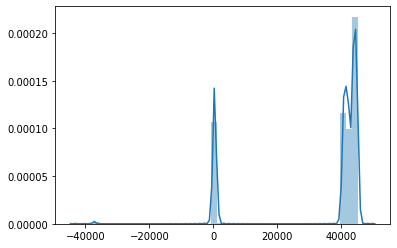

In [ ]:
# Minutewise 
sns.distplot(sorted(df['time_difference_minutes'].unique()))

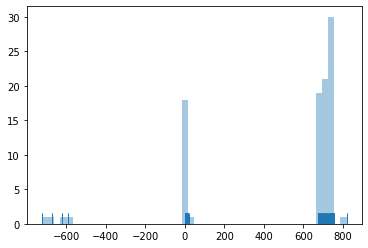

In [ ]:
sns.distplot(sorted(df['time_difference_hours'].unique()), rug = True, kde= False)

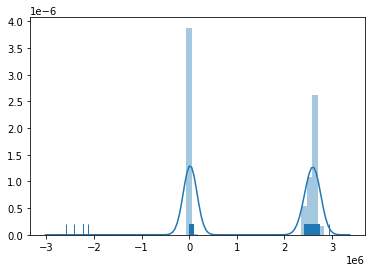

In [ ]:
sns.distplot(sorted(df['time_difference_secs'].unique()), rug = True)

In [ ]:
df.shape

(6572336, 22)

# Step 3 : Univariate Analysis

In [ ]:
# A list of all the features
df.columns

Index(['oid', '_vehicleId', 'speed', 'imei', 'cabCode', 'insertionTimeString',
       'timeString', 'deltaDistance', 'siteName'', 'course', 'mainPower',
       'vehicleColour', 'odometerDistance', 'fwVersion', 'address', 'cached',
       'Longitude', 'Latitude', 'time_difference_days',
       'time_difference_hours', 'time_difference_minutes',
       'time_difference_secs'],
      dtype='object')

## Feature : oid <br>

#### Description : Database ID <br>
----------------

In [ ]:
df['oid'].isnull().sum() 

0

In [ ]:
df['oid'].value_counts()

5e5f015ce4b089157fc0da42    1
5e5d56fae4b089157fa818b7    1
5e5d1333e4b089157fa3b164    1
5e612f49e4b089157fe20b0e    1
5e5ddd8ee4b089157faf773c    1
                           ..
5e5f4325e4b0949e58691709    1
5e5d483ce4b089157fa73da6    1
5e600b87e4b0949e586c099f    1
5e5fcb87e4b089157fcd4cfa    1
5e6112dee4b0949e586fed50    1
Name: oid, Length: 6572336, dtype: int64

### NOTE : The oid values are unique for each records/rows in the dataset with no missing values. Hence, we can drop this feature as it dosen't hold any relevance in terms of future EDA.

In [ ]:
# Delete 'oid'
del df['oid']

## Feature : _vehicleId <br>

#### Description : Hardware installed in Vehicle Identifier <br>
----------------

In [ ]:
# Total number of missing/null values in _vehicleId
df['_vehicleId'].isnull().sum() + len(df[df['_vehicleId'] == ""])

527166

In [ ]:
# Creating an lookup table for IMEI vs _vehicleId
sub_df = df[['imei','_vehicleId']].drop_duplicates()

In [ ]:
sub_df

,imei,_vehicleId
0,356306056969307,5c18e4aee178074803e7f483
1,868728032008770,5dcd4e7be178073c16531d3e
2,868728030767575,5cdb7198e178072799de9054
3,868728039207045,5e25907ae178077bf4318863
4,868728030809427,5e4a75b8445fd222ed52430e
...,...,...
1395395,868728030761552,5e4a7467445fd222ed523b57
1398410,868728032012418,5e57994c445fd222eda23ab3
1435815,868728032023118,5e380848e178073a09ed35e2
1591301,868728032179654,5e4d1613445fd222ed6498fc


In [ ]:
sub_df[sub_df['imei'] == '352353085240924']

,imei,_vehicleId
679068,352353085240924,


In [ ]:
sub_df[sub_df['imei'] == '352353085235668']

,imei,_vehicleId
683345,352353085235668,


In [ ]:
sub_df[sub_df['imei'] == '352353085234828']
# No vehicleId exists in database

,imei,_vehicleId
684543,352353085234828,


In [ ]:
sub_df[sub_df['imei'] == '352353085225297']
# For this a vehicleId exists 

,imei,_vehicleId
132,352353085225297,5c7e949ae178072a3e2c554a
689648,352353085225297,


## NOTE : Here we don't have any other option but to consider 'imei' feature as primary key/identifier for each vehicle, as many vehicle don't have '_vehicleId' values available.  

In [ ]:
#replace the blank values with "No _vehicleId Information" in _vehicleId column
df['_vehicleId'] = df['_vehicleId'].replace(to_replace = "", value ="No _vehicleId Information") 

In [ ]:
# Total number of _vehicleId records in dataset
len(df['_vehicleId'].unique())

195

In [ ]:
# Most frequent/active 20 _vehicleIds in the dataset
df['_vehicleId'].value_counts().head(20)

No _vehicleId Information    527166
5bd8c3d7e178075a9d25ae69      50735
5cacf574e178074b35b7bb82      48033
5da5a7cbe178076ef0e95c99      47190
5dc94880e17807733f3333c2      47063
5cecfc99e178073e3529048b      46622
5c88e7b4e17807290ed55683      46550
5bd46dd7e178075a9d22aef3      46351
5bfbfd6ae178070b0bd7937f      46320
5d7e675fe178072de0350b18      46311
5c18e4aee178074803e7f483      46247
5cd7c7ece178075037ac0198      46230
5c18d698e178074803e7e047      46181
5bd5960be178075a9d22d934      46155
5d5e3ce6e1780714b7ad2921      46125
5c03a359e178071ca178c62e      46096
5d11771ce178070e196931b9      46060
5cee6886e178073e352ea4ec      46018
5d84b607e17807043405f08c      45983
5bc5c5a9e178075a9d0e9b49      45955
Name: _vehicleId, dtype: int64

In [ ]:
# Least frequent/inactive 20 _vehicleIds in the dataset
df['_vehicleId'].value_counts().tail(20)

5cda36d7e178075680bb5c98    17308
5ddbbca3e178073e6114c8a8    17252
5cda3626e178075680bb5c67    17181
5cd92be0e178075680b6a83d    16651
5df8b2fbe178070144082aac    16362
5e57994c445fd222eda23ab3    16207
5cd92dece178075680b6ad85    15104
5da6dbe2e178076ef0fea7b5    13655
5e25907ae178077bf4318863    13630
5d2c51f9e1780714b71bc3f2    13629
5d0f552fe178070e195cb848    12576
5e380848e178073a09ed35e2    11685
5c33af60e1780709ffab4b28     7401
5cc7f0b6e178077f9659c75a     7079
5d80aa79e178072de0594674     6240
5c5ff2a8e178073c1958a815     5995
5d96d070e1780704344c1213     5701
5cf8f825e178071695579108     4308
5c7e949ae178072a3e2c554a     3707
5e258f85e178077bf4318321     1809
Name: _vehicleId, dtype: int64

In [ ]:
# A list of IMEI values for missing _vehicleId values
df[df["_vehicleId"] == "No _vehicleId Information"]['imei'].unique().tolist()

['356306056058366',
 '868728032137777',
 '356306056088884',
 '356306056915011',
 '356306054402988',
 '352353085229505',
 '356306056079586',
 '352353085228127',
 '356306055304001',
 '352353085229026',
 '868728032113604',
 '356306056803167',
 '356306056904726',
 '356306056920391',
 '356306056970214',
 '352353085240924',
 '352353085235668',
 '352353085234828',
 '352353085225297']

In [ ]:
df.shape

(6572336, 21)

### NOTE : There are XXXX missing values in '_vehicleId'. There are 167 vehicle records present in our dataset.


## Feature : speed <br>

#### Description : Speed of Vehicle <br> 
----------------

In [ ]:
df['speed'].isnull().sum()

0

In [ ]:
print("Maximum Speed :", df['speed'].max())
print("Minimum Speed :", df['speed'].min())
print("Average Speed :", df['speed'].mean())

Maximum Speed : 140.0
Minimum Speed : 0.0
Average Speed : 9.247322884894256


In [ ]:
# Information for max speeeding Vehicle
max_speed_loc = df['speed'].idxmax(axis=0, skipna=True)
print("---"*2 +'Packet Information for Max speeding Vehicle'+ "---"*2)
df.loc[max_speed_loc]

------Packet Information for Max speeding Vehicle------


,_vehicleId,speed,imei,cabCode,insertionTimeString,timeString,deltaDistance,siteName',course,mainPower,vehicleColour,odometerDistance,fwVersion,address,cached,Longitude,Latitude,time_difference_days,time_difference_hours,time_difference_minutes,time_difference_secs
1182900,5d763a32e178072de0976e37,0.0,868728030792540,1026,2020-02-03 21:48:03,2020-02-03 21:48:01,0.000,Maersk Bangalore,214.0,False,black,81925.498,NaN,"Tules Cad Cam Technologies Private Limited, 17...",False,77.719345,12.973220,0.0,0.0,0.0,2.0
1182900,5e4a75b8445fd222ed52430e,140.0,868728030809427,7937,2020-04-03 10:19:06,2020-04-03 10:19:05,0.504,Maersk Bangalore,24.0,False,orange,37082.723,NaN,"VR e-Biz Solutions Private Limited, 30/86, 25t...",False,77.550995,13.005557,0.0,0.0,0.0,1.0
1182900,5de11196e1780748c2ad9616,0.0,868728032184878,1295,2020-05-03 22:26:51,2020-05-03 22:26:50,0.000,Maersk Bangalore,172.0,False,black,72166.249,NaN,"Adarsh Palm Retreat road, RMZ Ecospace, Bellandur",False,77.683418,12.924902,0.0,0.0,0.0,1.0


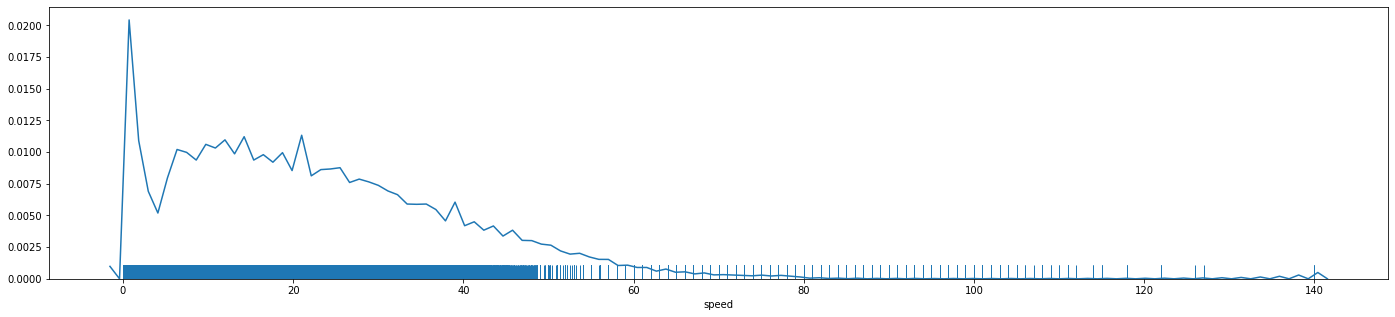

In [ ]:
# A distribution of whole fleet's operating speed values.
plt.figure(figsize=(24,5))
sns.distplot(df['speed'], rug=True, hist=False)

## Feature : Latitude and Longitude <br>

#### Description : GPS (Longitude , Latitude) value for the respective datapoint in the dataset <br> 
----------------

In [ ]:
# Total number of missing values in Cordinates value
df['Latitude'].isnull().sum() + df['Longitude'].isnull().sum()

0

In [ ]:
# Finding the most common (Latitude,Longitude) values in the whole dataset
gpsloc_df = df.groupby(['Latitude', 'Longitude']).size().reset_index(name='Freq')
gpsloc_df = gpsloc_df.sort_values('Freq', ascending=False)

In [ ]:
# Most frequent pinged GPS location collectively in all datasets 
gpsloc_df.head(10)

,Latitude,Longitude,Freq
991469,18.5857,73.9908,35646
1155302,23.2510,77.4169,27615
1151163,19.7049,74.7213,25818
964645,18.5625,73.9220,18309
811122,13.1554,80.0157,17973
935484,18.5418,73.9403,16540
1038578,18.6365,73.7601,15948
182000,12.9687,80.2484,15934
1081241,18.7875,75.7577,15774
962559,18.5616,73.9118,14681


In [ ]:
# Finding the most common (Latitude,Longitude) with respect to each unique vehicleId in the dataset
vehicle_gpsloc_df = df.groupby(['_vehicleId','Latitude', 'Longitude']).size().reset_index(name='Freq')
vehicle_gpsloc_df = vehicle_gpsloc_df.sort_values('Freq', ascending=False)

In [ ]:
# Most frequent pinged GPS location collectively in all datasets 
vehicle_gpsloc_df.head(10)

,_vehicleId,Latitude,Longitude,Freq
1686621,5de616c1e17807082a0ce1a3,18.5857,73.9908,35646
1977625,No _vehicleId Information,23.2510,77.4169,27615
104475,5bd8ce92e178075a9d2636d2,19.7049,74.7213,25818
1315114,5d771cc3e178072de0ab52b7,18.5625,73.9220,18309
1719688,5dea270fe1780701447f2ea1,13.1554,80.0157,17973
1137897,5d1a1f2ce178070e19a3c774,18.5418,73.9403,16540
1433533,5d8b3741e1780704346fd05b,18.6365,73.7601,15948
1148211,5d25cf47e178070e1905e070,18.7875,75.7577,15774
379286,5c542475e1780709ff42e0c6,18.6350,73.7620,14335
777113,5cd7c262e178075037abffa8,18.4850,73.9408,14152


In [ ]:
# Defining scope of gps coordinate values in dataset
latMin = min(df.Latitude)
latMax = max(df.Latitude)
longMin = min(df.Longitude)
longMax = max(df.Longitude)

In [ ]:
smopy.TILE_SERVER = "http://tile.basemaps.cartocdn.com/light_all/{z}/{x}/{y}.png"
smopy.TILE_SIZE = 256

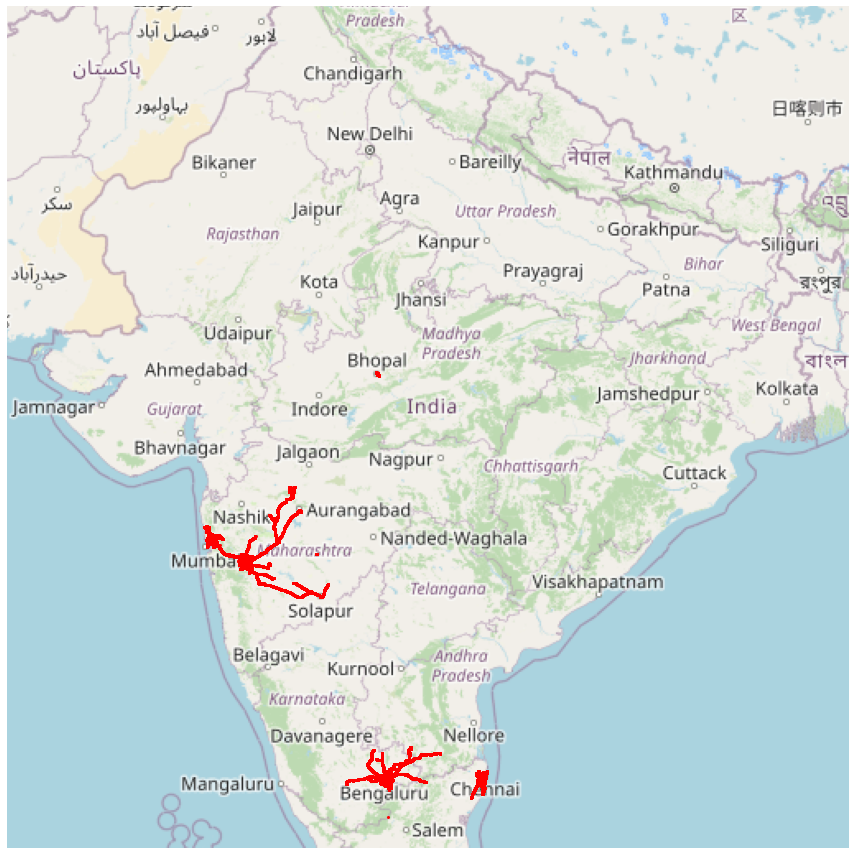

In [ ]:
mapAll = smopy.Map((latMin, longMin, latMax, longMax ), z=5)
x, y = mapAll.to_pixels(df.Latitude, df.Longitude)
ax = mapAll.show_mpl(figsize=(16, 12))
ax.plot(x, y, 'or', ms=2)

In [ ]:
df.shape

(6572336, 21)

## Feature : timestring <br>

#### Description : Timestamp of Data Generation <br> 
----------------

In [ ]:
df['timeString'].describe()

count                 6572336
unique                 445686
top       2020-04-03 08:04:26
freq                       38
first     2020-01-03 10:02:43
last      2020-06-03 23:59:55
Name: timeString, dtype: object

In [ ]:
df['timeString'].min(), df['timeString'].max()

(Timestamp('2020-01-03 10:02:43'), Timestamp('2020-06-03 23:59:55'))

In [ ]:
len(df['timeString'].unique())

445686

## Feature : imei <br>

#### Description : IMEI value of Cellular SIM in the hardware <br> 
----------------

In [ ]:
# Check for any null value in IMEI data
df['imei'].isnull().sum()

0

In [ ]:
# Total number of IMEI Values present in dataset
len(df['imei'].unique())

207

In [ ]:
df.columns

Index(['_vehicleId', 'speed', 'imei', 'cabCode', 'insertionTimeString',
       'timeString', 'deltaDistance', 'siteName'', 'course', 'mainPower',
       'vehicleColour', 'odometerDistance', 'fwVersion', 'address', 'cached',
       'Longitude', 'Latitude', 'time_difference_days',
       'time_difference_hours', 'time_difference_minutes',
       'time_difference_secs'],
      dtype='object')

No null values are present, hence we will be using this as vehicle Identifier/primary key

Feature : siteName
-----------
Detail : It represents the operating city/client of Vehicle

In [ ]:
df["siteName'"].isnull().sum() + len(df[df["siteName'"] == ""])

527166

In [ ]:
df["siteName'"].value_counts()

Pune                3199354
Maersk Bangalore    1520320
Chennai             1108372
                     527166
Mumbai               217124
Name: siteName', dtype: int64

In [ ]:
df.columns

Index(['_vehicleId', 'speed', 'imei', 'cabCode', 'insertionTimeString',
       'timeString', 'deltaDistance', 'siteName'', 'course', 'mainPower',
       'vehicleColour', 'odometerDistance', 'fwVersion', 'address', 'cached',
       'Longitude', 'Latitude', 'time_difference_days',
       'time_difference_hours', 'time_difference_minutes',
       'time_difference_secs'],
      dtype='object')

In [ ]:
df.columns.get_loc("siteName'"), df.columns.get_loc("Longitude"), df.columns.get_loc("Latitude") 

(7, 15, 16)

In [ ]:
# Function to replace siteName after reverse geocoding
# currently we are using osm service, nut switching to google geocode will improve the accuracy of imputation.
def fill_sitename(row):
  if row[7] == "":
    try :
      lat  = row[16]
      longitude = row[15]
      coordinates = (lat, longitude)
      location = rg.search(coordinates)
      location_df = pd.DataFrame(location)
      row[7] = location.name[0]

    except:
      #row[7] = location.admin2[0]
      print(row)

In [ ]:
# df.apply(fill_sitename, axis=1)

# Step 4 :Overspeeding Analysis
-------
### The rider analytics to a large extend depends on the speed at which the vehicle is driven.

### We will look for frequent speed violations and later use these parameters to cluster various rider types

In [ ]:
# Getting a value of all unique imei numbers
sub_df['imei'].value_counts()

868728032023118    2
868728030761552    2
352353085225297    2
868728032179654    2
868728032113604    2
                  ..
356306056914063    1
353612086995599    1
352353082689768    1
356306056059596    1
356306056905558    1
Name: imei, Length: 207, dtype: int64

In [ ]:
# Creating a list for IMEI numbers who are overspeeding above 80 Kmph
overspeedings = df.loc[df['speed'] >= 80, 'imei'].unique().tolist()

In [ ]:
# List of Overspeeding imei
overspeedings

['356306056984140',
 '352353082712636',
 '868728032197961',
 '868728032006006',
 '352353082668382',
 '356306055304993',
 '356306056079586',
 '356306056803167',
 '868728032007988',
 '868728032009992',
 '868728039189920',
 '868728032055458',
 '356306056972772',
 '356306056904965',
 '356306055349949',
 '353612088436147',
 '868728030585423',
 '356306056983829',
 '868728030794835',
 '868728032156280',
 '868728030566894',
 '356306055375456',
 '356306054369419',
 '356306056915995',
 '356306055349931',
 '868728030777491',
 '868728032146273',
 '356306056914063',
 '356306056934061',
 '868728032028745',
 '868728032111376',
 '352353085228127',
 '356306056060222',
 '356306056823553',
 '868728030760935',
 '356306055353065',
 '356306055350426',
 '356306055349774',
 '868728030779034',
 '352353085229026',
 '868728032142066',
 '356306056987309',
 '352353082689636',
 '868728032113604',
 '868728030767575',
 '868728032111202',
 '353612086995599',
 '353612088548354',
 '353612087235417',
 '352353085229505',


In [ ]:
# Number of Vehicles Overspeeding in database
len(overspeedings)

94

In [ ]:
#Reseting the index of original as the index values are not complete after dropping some rows previously
df = df.reset_index(drop=True)

# Creating an sub dataframe for overspeeding riders
speeding_df = df[df['speed'] >= 80]

#Reseting the index of df created
speeding_df = speeding_df.reset_index(drop=True)

# speeding_df = speeding_df[~speeding_df.index.duplicated()]
# df = df[~df.index.duplicated()]

# Map Visualization of vehicles trajectory which are overspeeding over 80Kmph <br>
---------
## NOTE : We are splitting the visualization into four parts to better utillize system memory 

In [ ]:
for id in overspeedings[0:20]:

  title = "Trajectory for Device with IMEI :"+str(id)
  figname = title+'.png'

  raw = df.loc[df['imei'] == id]
  #raw['timeString_date'] = pd.to_datetime(raw['timeString']).dt.date
  #raw['timeString_hour'] = pd.to_datetime(raw['timeString']).dt.hour

  raw_speeding = speeding_df.loc[df['imei'] == id]
  #raw_speeding['timeString_date'] = pd.to_datetime(raw['timeString']).dt.date
  #raw_speeding['timeString_hour'] = pd.to_datetime(raw['timeString']).dt.hour

  latMin = min(raw.Latitude)
  latMax = max(raw.Latitude)
  longMin = min(raw.Longitude)
  longMax = max(raw.Longitude)

  mapAll = smopy.Map((latMin, longMin, latMax, longMax )) #, z=20
  x1, y1 = mapAll.to_pixels(raw.Latitude, raw.Longitude)
  x2, y2 = mapAll.to_pixels(raw_speeding.Latitude, raw_speeding.Longitude)

  ax = mapAll.show_mpl(figsize=(16, 12))
  ax.set_title(title, size=25)
  ax.plot(x1, y1, '.g', x2, y2, 'or', markersize=8)
  
  plt.savefig(figname)

In [ ]:
for id in overspeedings[21:40]:

  title = "Trajectory for Device with IMEI :"+str(id)
  figname = title+'.png'

  raw = df.loc[df['imei'] == id]
  #raw['timeString_date'] = pd.to_datetime(raw['timeString']).dt.date
  #raw['timeString_hour'] = pd.to_datetime(raw['timeString']).dt.hour

  raw_speeding = speeding_df.loc[df['imei'] == id]
  #raw_speeding['timeString_date'] = pd.to_datetime(raw['timeString']).dt.date
  #raw_speeding['timeString_hour'] = pd.to_datetime(raw['timeString']).dt.hour

  latMin = min(raw.Latitude)
  latMax = max(raw.Latitude)
  longMin = min(raw.Longitude)
  longMax = max(raw.Longitude)

  mapAll = smopy.Map((latMin, longMin, latMax, longMax )) #, z=20
  x1, y1 = mapAll.to_pixels(raw.Latitude, raw.Longitude)
  x2, y2 = mapAll.to_pixels(raw_speeding.Latitude, raw_speeding.Longitude)

  ax = mapAll.show_mpl(figsize=(16, 12))
  ax.set_title(title, size=25)
  ax.plot(x1, y1, '.g', x2, y2, 'or', markersize=8)
  
  plt.savefig(figname)

In [ ]:
for id in overspeedings[41:60]:

  title = "Trajectory for Device with IMEI :"+str(id)
  figname = title+'.png'

  raw = df.loc[df['imei'] == id]
  #raw['timeString_date'] = pd.to_datetime(raw['timeString']).dt.date
  #raw['timeString_hour'] = pd.to_datetime(raw['timeString']).dt.hour

  raw_speeding = speeding_df.loc[df['imei'] == id]
  #raw_speeding['timeString_date'] = pd.to_datetime(raw['timeString']).dt.date
  #raw_speeding['timeString_hour'] = pd.to_datetime(raw['timeString']).dt.hour

  latMin = min(raw.Latitude)
  latMax = max(raw.Latitude)
  longMin = min(raw.Longitude)
  longMax = max(raw.Longitude)

  mapAll = smopy.Map((latMin, longMin, latMax, longMax )) #, z=20
  x1, y1 = mapAll.to_pixels(raw.Latitude, raw.Longitude)
  x2, y2 = mapAll.to_pixels(raw_speeding.Latitude, raw_speeding.Longitude)

  ax = mapAll.show_mpl(figsize=(16, 12))
  ax.set_title(title, size=25)
  ax.plot(x1, y1, '.g', x2, y2, 'or', markersize=8)
  
  plt.savefig(figname)

In [ ]:
for id in overspeedings[61:80]:

  title = "Trajectory for Device with IMEI :"+str(id)
  figname = title+'.png'

  raw = df.loc[df['imei'] == id]
  #raw['timeString_date'] = pd.to_datetime(raw['timeString']).dt.date
  #raw['timeString_hour'] = pd.to_datetime(raw['timeString']).dt.hour

  raw_speeding = speeding_df.loc[df['imei'] == id]
  #raw_speeding['timeString_date'] = pd.to_datetime(raw['timeString']).dt.date
  #raw_speeding['timeString_hour'] = pd.to_datetime(raw['timeString']).dt.hour

  latMin = min(raw.Latitude)
  latMax = max(raw.Latitude)
  longMin = min(raw.Longitude)
  longMax = max(raw.Longitude)

  mapAll = smopy.Map((latMin, longMin, latMax, longMax )) #, z=20
  x1, y1 = mapAll.to_pixels(raw.Latitude, raw.Longitude)
  x2, y2 = mapAll.to_pixels(raw_speeding.Latitude, raw_speeding.Longitude)

  ax = mapAll.show_mpl(figsize=(16, 12))
  ax.set_title(title, size=25)
  ax.plot(x1, y1, '.g', x2, y2, 'or', markersize=8)
  
  plt.savefig(figname)

In [ ]:
for id in overspeedings[81:-1]:

  title = "Trajectory for Device with IMEI :"+str(id)
  figname = title+'.png'

  raw = df.loc[df['imei'] == id]
  #raw['timeString_date'] = pd.to_datetime(raw['timeString']).dt.date
  #raw['timeString_hour'] = pd.to_datetime(raw['timeString']).dt.hour

  raw_speeding = speeding_df.loc[df['imei'] == id]
  #raw_speeding['timeString_date'] = pd.to_datetime(raw['timeString']).dt.date
  #raw_speeding['timeString_hour'] = pd.to_datetime(raw['timeString']).dt.hour

  latMin = min(raw.Latitude)
  latMax = max(raw.Latitude)
  longMin = min(raw.Longitude)
  longMax = max(raw.Longitude)

  mapAll = smopy.Map((latMin, longMin, latMax, longMax )) #, z=20
  x1, y1 = mapAll.to_pixels(raw.Latitude, raw.Longitude)
  x2, y2 = mapAll.to_pixels(raw_speeding.Latitude, raw_speeding.Longitude)

  ax = mapAll.show_mpl(figsize=(16, 12))
  ax.set_title(title, size=25)
  ax.plot(x1, y1, '.g', x2, y2, 'or', markersize=8)
  
  plt.savefig(figname)

# Generating Overspeed summary in .txt

In [ ]:
for id in overspeedings:

  violation_locations = speeding_df.loc[df['imei'] == str(id), 'address'].unique().tolist()
  violation_timestamps = pd.to_datetime(speeding_df.loc[df['imei'] == str(id), 'timeString'].unique().tolist())

  print("----"*30)
  print("For Vehicle with IMEI :"+ id)
  print("\nNumber of Vioaltions : ", len(violation_timestamps))
  print("\nLocation of Violation:\n",violation_locations )
  print("\nTime of Violation :\n", violation_timestamps)

------------------------------------------------------------------------------------------------------------------------
For Vehicle with IMEI :356306056984140

Number of Vioaltions :  29

Location of Violation:
 ['Veterinary College Garden, Bellary Road, RMV Stage II - 1st Block', 'SH33, Jampenahalli, Koratagere taluku', 'NH48, Dodderi, Nelamangala taluk', 'NH965, Solāpur, Solapur', 'Jejuri Morgaon Baramati Road, Margaon, Pune', 'Mumbai-Pune Expressway, Talegaon, Pune', 'State Highway 60, Ahmadnagar, Maharashtra', 'Vashi, Palm Beach Marg, Sector 17', 'Thane Belapur North, Turbhe Village, Turbhe', 'Kattumnallur Gate, Old Madras Road, Kattamanallur', 'Grade Separator, Nigdi, Ravet', 'Medicity Hospital, Sion Panvel Highway, Kharghar', 'CBD Belapur ST Bus pickup, Sion Panvel Highway, Artists Village Sector 8A', 'Ravindu Toyota, Old Madras Road, Virgonagar', 'Hosakote Chinthamani Road, Nandagudi, Hosakote taluk', 'SH82, Nelavanki, Srinivasapura taluku', 'Anantapur - Krishnagiri Road, Tanna

In [ ]:

with open("violation_details.txt", "w") as text_file:
  for id in overspeedings:
      violation_locations = speeding_df.loc[df['imei'] == str(id), 'address'].unique().tolist()
      violation_timestamps = pd.to_datetime(speeding_df.loc[df['imei'] == str(id), 'timeString'].unique().tolist())
      
      text_file.write("----"*30)
      text_file.write("For Vehicle with IMEI : {}".format(id))
      text_file.write("\nNumber of Vioaltions : {}".format( len(violation_timestamps) ))
      text_file.write("\nLocation of Violation:\n{}".format(violation_locations))
      text_file.write("\nTime of Violation :\n{}".format(violation_timestamps))

print("----"*30)
print("All the violation details succesfully written to file 'violation_details.txt'")
print("----"*30)

------------------------------------------------------------------------------------------------------------------------
All the violation details succesfully written to file 'violation_details.txt'
------------------------------------------------------------------------------------------------------------------------


------------------
# Clustering Drivers/Vehicles (Performed in a different notebook):
------------------
### Here we will cluster the data by unsupervised ML and try to separate Bad, Average and Good driver based upon data generated by them <br>

### It is important to classify drivers so that we can separate liability from asset performers(drivers in our case).

-----------
## NOTE : We are performing the Unsupervised Classification via KMeans Clustering in different notebook i.e. <br> 
# Creating and Visualizing Clusters in Data 25GBRAM.ipynb